In [2]:
# importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import yfinance as yf   
plt.style.use('classic')

In [3]:
# download AAPL data 
ticker = 'AAPL'
aapl_data = yf.download('AAPL', start='2020-01-01')

# set the index into a datetime object
aapl_data.index = pd.to_datetime(aapl_data.index)
    
# drop the missing values to not get erroneous data observation
aapl_data.dropna(inplace=True)

# print numer of rows
print('Number of rows: ', aapl_data.shape[0])

# display the count on null values
aapl_data.isna().sum()

# print the data using option context for a cleaner visualization
with pd.option_context('display.max_rows',None, 'display.max_columns',None):
    print(aapl_data.tail())


[*********************100%***********************]  1 of 1 completed

Number of rows:  1193
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228.460007  229.520004  227.300003  227.789993  227.789993   

              Volume  
Date                  
2024-09-23  54146000  
2024-09-24  43556100  
2024-09-25  42308700  
2024-09-26  36636700  
2024-09-27  33993600  


# check for the duplicates data
duplicate_counts = aapl_data.duplicated().value_counts()  

# verify
if True in duplicate_counts():
    proportion_duplicates = round(duplicate_counts[True]/aapl_data.shape[0],4)
else:
    proportion_duplicates = 0  # if there aren't duplicates the proportion is 0

print('Proportion of duplicate values is {}'.format(proportion_duplicates))

"""
print('Proportion of duplicate value is {}.'.format(
    round(aapl_data.duplicated().value_counts()[1]/aapl_data.shape[0],
          4)))
"""

"""
duplicated() returns a series of True and False indicating whether the corresponding observation is duplicated or not.
value_counts() returns the count of True and False.
[1] indicates the True valour. If in the data there are 10 duaplicate. that value will be 10
shape[0] selects the number of rows in the Dataframe 
round(...,4 this method round(arrotonda) the last decimal number
the division works like this example: 10 / 100 = 0.1 (so 10% of the rows are duplicated)
"""

# Drop the consecutive duplicate values
aapl_data = aapl_data.loc[(aapl_data['close'].diff() != 0) | 
                                        (aapl_data['open'].diff() != 0) |
                                        (aapl_data['high'].diff() != 0) |
                                        (aapl_data['low'].diff() != 0)]

# Check the number of rows
print("Number of rows: ", aapl_data.shape[0])


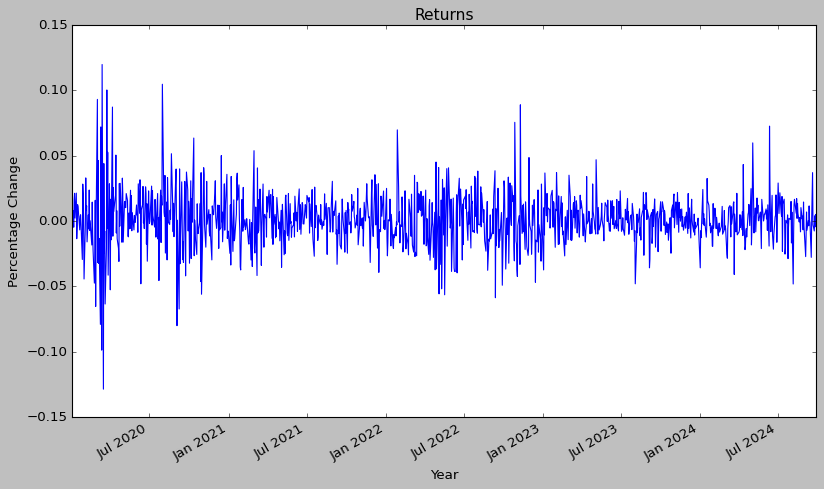

In [4]:
# outliers: are values used manage when the change is too big when the percentage change is plotted on the graph

# calculate the percentage change
aapl_data['returns'] = aapl_data['Close'].pct_change()

# plot the pcr change 
plt.figure(figsize=(12,7))
aapl_data['returns'].plot()

# set the tile
plt.title('Returns', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)

#show the plot 
plt.show()

Data cleaning is an important part of any process that deals with data. Without it, the analysis might fail and give misleading results

Data cleaning is time-consuming but the most important and rewarding part of the data analysis process. The process of data analysis is incomplete without cleaning data.

But what happens if we skip this step?

Suppose we had certain erroneous data in our price data. The incorrect data formed outliers in our dataset. And our machine learning model assumed that this part of the dataset (maybe the price of Tesla did jump from $50 to $500 in one day). You know what is the end result of the analysis now.

The machine learning model gives false results and no one wants that! Since the predictions are way off, you have to start the analysis from scratch, again! Thus, data cleaning is an important part of analysis which shouldn’t be skipped.